In [1]:
import pandas as pd
master_table = pd.read_csv('/Users/suchirnaik/Downloads/KPMG/master_table_for_fuzzy.csv')

In [2]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39


In [3]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39


In [4]:
brands = master_table['brand'].unique()


In [5]:
brands

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [6]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                      bool
order_status                    object
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
standard_cost                  float64
product_first_sold_date         object
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator              object
owns_car                        object
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                  

In [7]:
### Converting the respective features to Binary
#### 1. online_order
#### 2. deceased_indiactor
#### 3. Owns_car

In [8]:
#First dropping the un-necssary columsn
columns_to_drop = ['standard_cost', 'product_first_sold_date']
master_table.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
## Converting to boolean:

In [10]:
master_table['online_order'].unique()

array([False,  True])

In [11]:
master_table['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
master_table['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
#False -0 , True -1
#N- 0, Y-1
#No - 0, Yes -1 

In [14]:
master_table['deceased_indicator'].value_counts()

N    17106
Y        8
Name: deceased_indicator, dtype: int64

In [15]:
master_table['online_order'] = master_table['online_order'].replace({True: 1, False: 0})

In [16]:
master_table['online_order'].unique()

array([0, 1])

In [17]:
master_table['owns_car'] = master_table['owns_car'].replace({'Yes': 1, 'No': 0})

In [18]:
master_table['owns_car'].unique()

array([1, 0])

In [19]:
master_table['deceased_indicator'] = master_table['deceased_indicator'].replace({'Y': 1, 'N': 0})

In [20]:
master_table['deceased_indicator'].unique()

array([0, 1])

In [21]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,Approved,OHM Cycles,Road,medium,medium,...,7.0,39.0,4217.0,6.111111,6.000000,5.946524,5.862069,34,8,6777.43
17110,19996,51,1018,2017-06-24,1,Approved,OHM Cycles,Standard,high,medium,...,7.0,23.0,3109.0,6.576923,6.000000,5.538462,5.862069,26,5,6164.88
17111,19997,41,127,2017-11-09,1,Approved,Solex,Road,medium,medium,...,19.0,43.0,4405.0,5.608696,8.333333,5.610687,5.978571,23,10,9949.62
17112,19998,87,2284,2017-04-14,1,Approved,OHM Cycles,Standard,medium,medium,...,14.0,43.0,3630.0,6.250000,5.692308,5.610687,5.568306,34,7,7556.94


In [22]:
#Also dropping order status
master_table.drop('order_status', axis=1, inplace=True)

In [23]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
dtype: object

In [24]:
master_table['gender'].value_counts()

Female    8505
Male      8209
U          400
Name: gender, dtype: int64

In [25]:
master_table_one_hot = pd.get_dummies(master_table, columns=['brand', 'product_line', 'product_class', 'product_size','gender','job_title','wealth_segment'])

In [26]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer II,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,0,1
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,0,1,0,0
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,0,1
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,0,1
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,0,1
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
dtype: object

In [28]:
master_table['product_id'].unique()

array([  2,   3,  37,  88,  25,  22,  15,  67,  12,  61,  35,  16,  33,
        54,  27,  82,  89,  64,  19,  72,  91,   1,  99,   0,  92,  14,
        44,  76,  46,  55,  66,  81,  86,  32,  77,  96,   6,  47,  94,
        93,  60,  28,   4,  38,  58,  50,  80,  87,  84,  31,  62,  17,
        73,  45,  95,  18,  78,  70,  26,  36,  98,  75,  42,  24,  65,
        29,  10,   7,   9,  56,  69,  97, 100,  90,  20,  34,  74,  57,
        23,   5,  51,  63,  40,   8,  13,  30,  21,  48,  49,  53,  68,
        79,  71,  59,  83,  39,  43,  11,  52,  85,  41])

In [29]:
### Finding the optimal number of clusters 

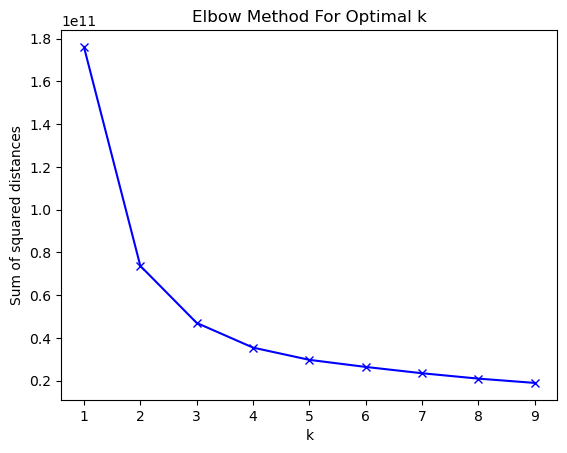

In [30]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.475523604365343
For n_clusters = 3, the silhouette score is 0.4033039302234717
For n_clusters = 4, the silhouette score is 0.35039865766877915
For n_clusters = 5, the silhouette score is 0.3128470107934936


In [32]:
#Silouhetter score was less. Trying to increase score by dropping certain columns

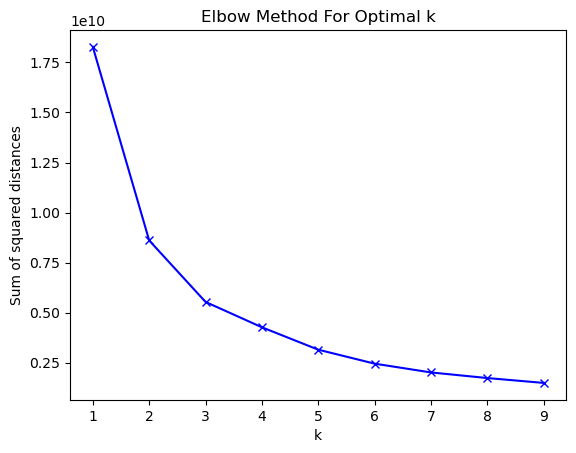

In [33]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


##### Increase in silouhetter scores can be seen by dropping irrelavant columns which may not be useful for clustering

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4970877975158036
For n_clusters = 3, the silhouette score is 0.435037532984613
For n_clusters = 4, the silhouette score is 0.4208647110787514
For n_clusters = 5, the silhouette score is 0.4342146934322485


In [35]:
master_table['product_line'].unique()

array(['Standard', 'Road', 'Touring', 'Mountain'], dtype=object)

In [36]:
master_table['product_class'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [37]:
master_table['product_size'].unique()

array(['medium', 'large', 'small'], dtype=object)

In [38]:
master_table_one_hot.dtypes

transaction_id                       int64
product_id                           int64
customer_id                          int64
transaction_date                    object
online_order                         int64
                                     ...  
job_title_Web Developer III          uint8
job_title_Web Developer IV           uint8
wealth_segment_Affluent Customer     uint8
wealth_segment_High Net Worth        uint8
wealth_segment_Mass Customer         uint8
Length: 235, dtype: object

In [39]:
downloads_folder = f'/Users/suchirnaik/Downloads/KPMG/'


file_name = 'master_table_one_hot.csv'


file_path = downloads_folder + file_name

master_table_one_hot.to_csv(file_path, index=False) 

In [40]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,0,Solex,Standard,medium,medium,71.49,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,1,Trek Bicycles,Standard,medium,large,2091.47,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,0,OHM Cycles,Standard,low,medium,1793.43,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,0,Norco Bicycles,Standard,medium,medium,1198.46,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,1,Giant Bicycles,Road,medium,medium,1538.99,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,OHM Cycles,Road,medium,medium,742.54,...,7.0,39.0,4217.0,6.111111,6.000000,5.946524,5.862069,34,8,6777.43
17110,19996,51,1018,2017-06-24,1,OHM Cycles,Standard,high,medium,2005.66,...,7.0,23.0,3109.0,6.576923,6.000000,5.538462,5.862069,26,5,6164.88
17111,19997,41,127,2017-11-09,1,Solex,Road,medium,medium,416.98,...,19.0,43.0,4405.0,5.608696,8.333333,5.610687,5.978571,23,10,9949.62
17112,19998,87,2284,2017-04-14,1,OHM Cycles,Standard,medium,medium,1636.90,...,14.0,43.0,3630.0,6.250000,5.692308,5.610687,5.568306,34,7,7556.94


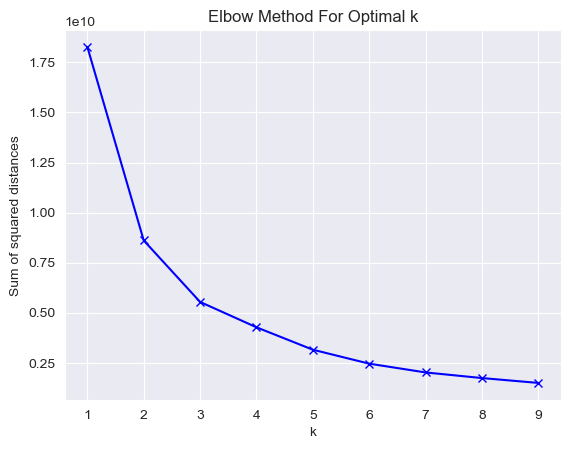

In [215]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [132]:
X

,product_id,customer_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,2,2950,0,71.49,1,10.0,0.0,3064.0,0,0,...,0,0,0,0,0,0,0,0,1,5
1,3,3120,1,2091.47,1,10.0,38.0,2196.0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,37,402,0,1793.43,0,22.0,40.0,2835.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,88,3135,0,1198.46,0,16.0,0.0,2096.0,0,1,...,0,0,0,0,0,0,0,0,1,7
4,25,2339,1,1538.99,1,16.0,0.0,2153.0,1,0,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,718,1,742.54,1,7.0,39.0,4217.0,0,0,...,0,0,0,0,0,0,0,0,1,3
17110,51,1018,1,2005.66,1,7.0,23.0,3109.0,0,0,...,0,0,0,0,0,0,0,0,1,0
17111,41,127,1,416.98,0,19.0,43.0,4405.0,0,0,...,0,0,0,0,0,0,0,0,1,3
17112,87,2284,1,1636.90,0,14.0,43.0,3630.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649


In [43]:
### Filtering columns 

In [44]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder


In [45]:
variances = master_table_one_hot.var()

/var/folders/0w/78_w9pm16ts4trsks5rjpd440000gn/T/ipykernel_18515/1104478273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = master_table_one_hot.var()


In [46]:
threshold = 0.1

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

In [47]:
df_selected

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Road,product_line_Standard,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,2.0,0.0,71.49,1.0,10.0,0.0,3064.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.0,1.0,2091.47,1.0,10.0,38.0,2196.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,37.0,0.0,1793.43,0.0,22.0,40.0,2835.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1198.46,0.0,16.0,0.0,2096.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,25.0,1.0,1538.99,1.0,16.0,0.0,2153.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9.0,1.0,742.54,1.0,7.0,39.0,4217.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17110,51.0,1.0,2005.66,1.0,7.0,23.0,3109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17111,41.0,1.0,416.98,0.0,19.0,43.0,4405.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17112,87.0,1.0,1636.90,0.0,14.0,43.0,3630.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


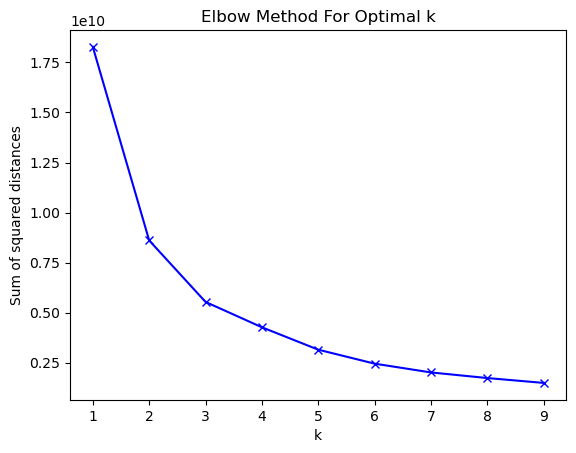

In [48]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649


In [50]:
threshold = 0.2

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected_2 = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

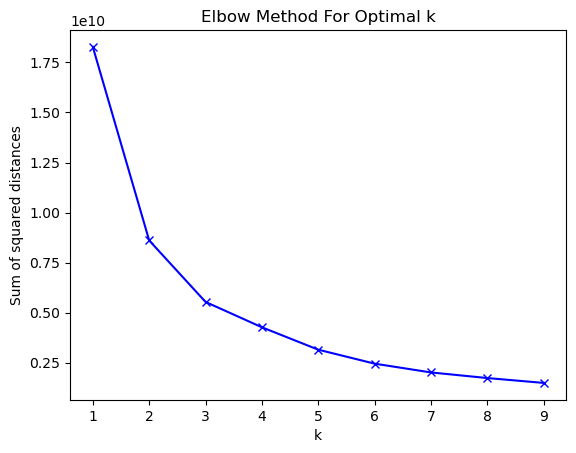

In [51]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49702157035110534
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.43425706456421237
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574
For n_clusters = 9, the silhouette score is 0.4393903429938785
For n_clusters = 10, the silhouette score is 0.4435806499443591
For n_clusters = 11, the silhouette score is 0.4246666738701766
For n_clusters = 12, the silhouette score is 0.4307232579051154
For n_clusters = 13, the silhouette score is 0.42341238076818777
For n_clusters = 14, the silhouette score is 0.4297658859997054


In [54]:
# We can see that by increasing the variance threshold the clusters get better but increasing the cluster number increases the value of the score . So more the clusters the better . So we will now experiment with the originjal columns if by increasing cluatsers the score increases.We want to get a score close to 0.5

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4970873905269969
For n_clusters = 3, the silhouette score is 0.4350373195691807
For n_clusters = 4, the silhouette score is 0.42086662385877344
For n_clusters = 5, the silhouette score is 0.43421705967992585
For n_clusters = 6, the silhouette score is 0.4388469572650544
For n_clusters = 7, the silhouette score is 0.4425880151473261
For n_clusters = 8, the silhouette score is 0.45110388972153637
For n_clusters = 9, the silhouette score is 0.43940082369839895
For n_clusters = 10, the silhouette score is 0.4435907397930656
For n_clusters = 11, the silhouette score is 0.42467583665524555
For n_clusters = 12, the silhouette score is 0.43074018066162567
For n_clusters = 13, the silhouette score is 0.42342041848740714
For n_clusters = 14, the silhouette score is 0.42977867056917546
For n_clusters = 15, the silhouette score is 0.4301035550322913
For n_clusters = 16, the silhouette score is 0.4211277296787565
For n_clusters = 17, the silhouette scor

In [56]:
#Aslo just checking once woth all the columns  of how the sillouhette score varies

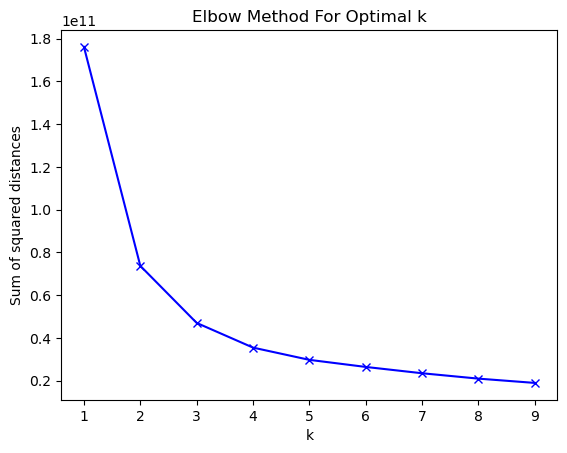

In [57]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X_2 = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.475523604365343
For n_clusters = 3, the silhouette score is 0.4033039302234717
For n_clusters = 4, the silhouette score is 0.35039865766877915
For n_clusters = 5, the silhouette score is 0.3128470107934936
For n_clusters = 6, the silhouette score is 0.3165957385898179
For n_clusters = 7, the silhouette score is 0.2958012381625307
For n_clusters = 8, the silhouette score is 0.30973879592890685
For n_clusters = 9, the silhouette score is 0.2989363130541131
For n_clusters = 10, the silhouette score is 0.3030242330846285
For n_clusters = 11, the silhouette score is 0.29980216396971726
For n_clusters = 12, the silhouette score is 0.29338204913727584
For n_clusters = 13, the silhouette score is 0.2864619100510886
For n_clusters = 14, the silhouette score is 0.2840292657864037
For n_clusters = 15, the silhouette score is 0.2801101960550057
For n_clusters = 16, the silhouette score is 0.2723230136716856
For n_clusters = 17, the silhouette score is 

In [59]:
# We can see fro the above that thre is a considerable increase in the score when we select columns 
## We shall choose 8 clusters for this project which should be idle.
## Why are we choosing more clusters?
# 1.Increased Personalization: More clusters mean finer segmentation, which allows for highly personalized recommendations. Customers within each cluster likely have very similar preferences, enabling more precise recommendations.
# 2. Customer Satisfaction: Customers often appreciate recommendations that resonate with their specific preferences. By having more clusters and providing more targeted recommendations, you can enhance customer satisfaction and engagement.
# 3. Different clusters may have different preferences for various products or services. More clusters can help you capture a wider range of preferences and suggest a more diverse set of products.

In [60]:
master_table_one_hot.drop('cluster', axis=1, inplace=True)

KeyError: "['cluster'] not found in axis"

In [ ]:
##3 Visualising the plot using PCA

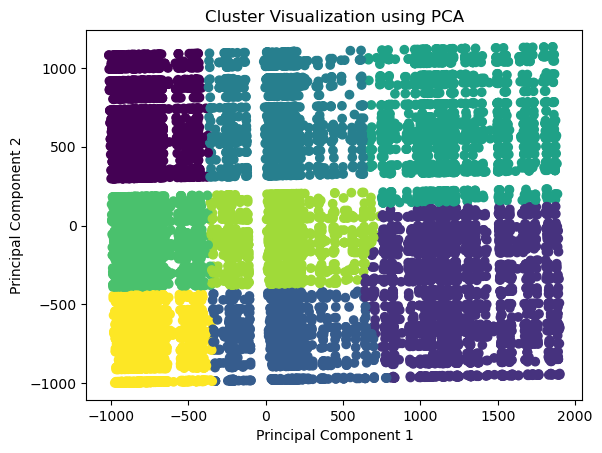

In [40]:
## It can be seen below thta all the clusters are pretty well seperated
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

# Assuming 'X' contains your data (features including one-hot encoded)
# Assuming 'labels' contains the cluster labels for each data point

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot in the reduced PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()


In [47]:
X ###3 x shoukld have customer id also since we want to group customers who have bought similar producst

,product_id,online_order,list_price,deceased_indicator,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,2,0,71.49,0,1,10.0,0.0,3064.0,0,0,...,0,0,0,0,0,0,0,0,1,3
1,3,1,2091.47,0,1,10.0,38.0,2196.0,0,0,...,0,0,0,0,0,0,0,0,1,7
2,37,0,1793.43,0,0,22.0,40.0,2835.0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,88,0,1198.46,0,0,16.0,0.0,2096.0,0,1,...,0,0,0,0,0,0,0,0,1,5
4,25,1,1538.99,0,1,16.0,0.0,2153.0,1,0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,1,742.54,0,1,7.0,39.0,4217.0,0,0,...,0,0,0,0,0,0,0,0,1,4
17110,51,1,2005.66,0,1,7.0,23.0,3109.0,0,0,...,0,0,0,0,0,0,0,0,1,2
17111,41,1,416.98,0,0,19.0,43.0,4405.0,0,0,...,0,0,0,0,0,0,0,0,1,4
17112,87,1,1636.90,0,0,14.0,43.0,3630.0,0,0,...,0,0,0,0,0,0,0,1,0,2


In [43]:
X

,product_id,online_order,list_price,deceased_indicator,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,2,0,71.49,0,1,10.0,0.0,3064.0,0,0,...,0,0,0,0,0,0,0,0,1,3
1,3,1,2091.47,0,1,10.0,38.0,2196.0,0,0,...,0,0,0,0,0,0,0,0,1,7
2,37,0,1793.43,0,0,22.0,40.0,2835.0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,88,0,1198.46,0,0,16.0,0.0,2096.0,0,1,...,0,0,0,0,0,0,0,0,1,5
4,25,1,1538.99,0,1,16.0,0.0,2153.0,1,0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,1,742.54,0,1,7.0,39.0,4217.0,0,0,...,0,0,0,0,0,0,0,0,1,4
17110,51,1,2005.66,0,1,7.0,23.0,3109.0,0,0,...,0,0,0,0,0,0,0,0,1,2
17111,41,1,416.98,0,0,19.0,43.0,4405.0,0,0,...,0,0,0,0,0,0,0,0,1,4
17112,87,1,1636.90,0,0,14.0,43.0,3630.0,0,0,...,0,0,0,0,0,0,0,1,0,2


In [44]:
last_column_X = X.iloc[:, -1]

last_column_X

0        3
1        7
2        2
3        5
4        7
        ..
17109    4
17110    2
17111    4
17112    2
17113    7
Name: cluster, Length: 17114, dtype: int32

In [48]:
# Concatenate the last column of df1 to df2 as a new column
master_table_one_hot['cluster'] = last_column_X.values


In [ ]:
### we would also need to have of multiple products are bring purchased

In [52]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,3
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,7
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,2
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,5
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,1,4
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,1,2
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,1,4
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,1,0,2


In [53]:
master_table_one_hot = master_table_one_hot.drop_duplicates()

In [54]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,3
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,7
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,2
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,5
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,1,4
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,1,2
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,1,4
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,1,0,2


##### Final master table with the clusters

In [51]:

master_table_one_hot[master_table_one_hot['customer_id']==1]

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
82,94,86,1,2017-12-23,0,235.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3238,3765,38,1,2017-04-06,1,1577.53,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
4427,5157,47,1,2017-05-11,1,1720.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
8422,9785,72,1,2017-01-05,0,360.40,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
11510,13424,2,1,2017-02-21,0,71.49,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
11692,13644,25,1,2017-05-19,0,1538.99,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
12419,14486,23,1,2017-03-27,0,688.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
12792,14931,31,1,2017-12-14,1,230.91,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
13408,15663,32,1,2017-06-04,1,642.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
14064,16423,9,1,2017-12-09,1,742.54,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## Creation of the mebership functions based on the EDA that we did 

In [55]:
### 1. Memebership recency 

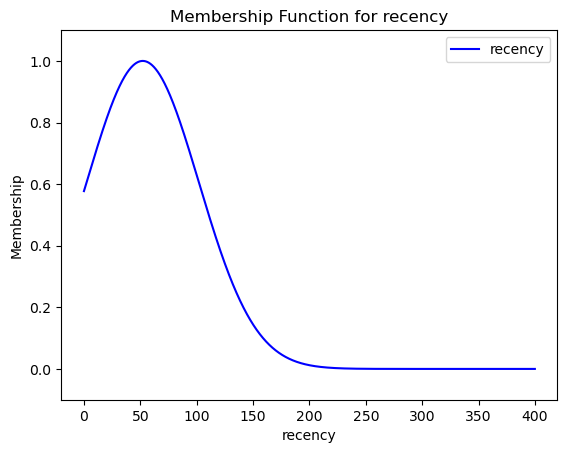

In [56]:
#While doing the eda we found that customers ususlally purchase with a recency of about 60 days . There fore we use a guassian bell curve for recommdations after 60 days
#The reasoning is that promortions are to be sent to the customer when they reach the 60 day average and maembership be adjusted based on that
# So the bell curve function also works in that way that it increases towards the mean and then decrease
# Writeabout the advantages of using this bell curve 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def membership_income(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

x = np.arange(0, 400, 0.1)
mfx = membership_income(x)

plt.plot(x, mfx, 'b', linewidth=1.5, label='recency')
plt.title('Membership Function for recency')
plt.xlabel('recency')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

In [57]:
### 2. Membership Frequency

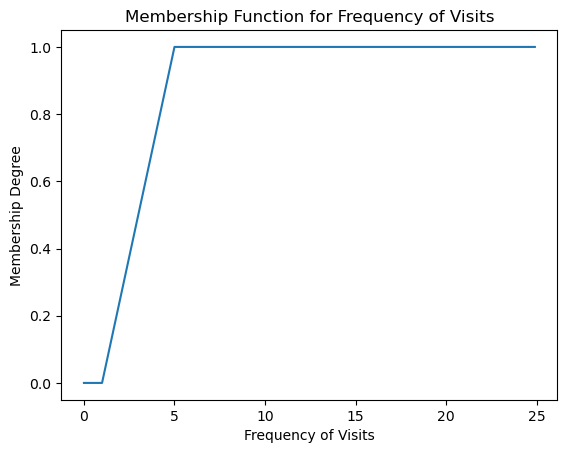

In [58]:
#Membership increases upto the 75th percentile and then becomes a constant one 
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 25, 0.1)
mfx = membership_frequency_of_visits(x)

plt.plot(x, mfx)
plt.title('Membership Function for Frequency of Visits')
plt.xlabel('Frequency of Visits')
plt.ylabel('Membership Degree')
plt.show()
#We want the frequency to increase and teh n become constant 
#since we would like to recommend products to high frquency customers

### 3. Monetray value

In [59]:
##### We will have to decide which fuzzy logic we would like to use based on the buisness logic
##### For now we will go ahead with the secoind memebership function since we would like to reommend more items to thos  who have purchased more
##### But again not all businesses would like to recommend items to only those who purchase more or have a high memebership score or have the best correlation between items based on traditional recommedations. This is when fuzzy logic can come into the picture to dteremine recommendations based on buisness insights or business values 

/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/membership/generatemf.py:149: RuntimeWarning: overflow encountered in power
  return 1. / (1. + np.abs((x - c) / a) ** (2 * b))


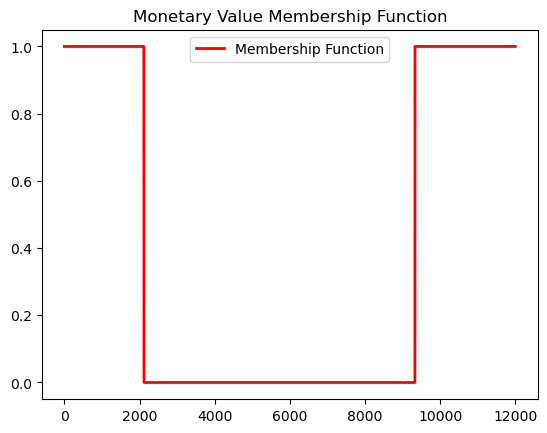

In [60]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mean = (b+c)/2
    width = (c-b)/2
    mfx = fuzz.gbellmf(x, width, mean, a)
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 12000, 1)
mfx = membership_monetary_value(x)

fig, ax = plt.subplots()
ax.plot(x, mfx, 'r', linewidth=2, label='Membership Function')
ax.set_title('Monetary Value Membership Function')
ax.legend()
plt.show()
#This bell-shaped membership function is useful for cases where we don't want to recommend products to 
#customers who have been purchasing a good average spend. However, in case the customer is purchasing low 
#monetary value we would like to recommend products to these customers. Also, in cases where customers have a 
#very high average spend, we would like to recommend premium products to these customers. This tactic could 
#be used when companies are trying to save on emails and are trying to send promotions to only customers who 
#are not purchasing, or those who are spending very high amounts. Again, seasonality can be used to see which 
#membership is best useful. When sales are going well recommendations can be sent to only customers who are not 
#purchasing. Therefore, fuzzy logic allows for a lot of flexibility and also seasonality can be taken into 
#consideration as to which membership has to be used.


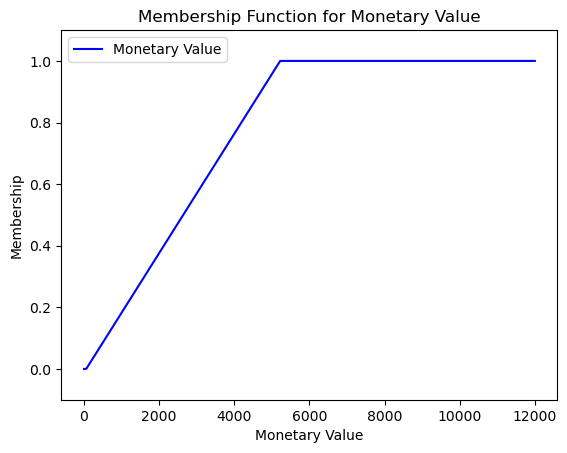

In [61]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 12000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



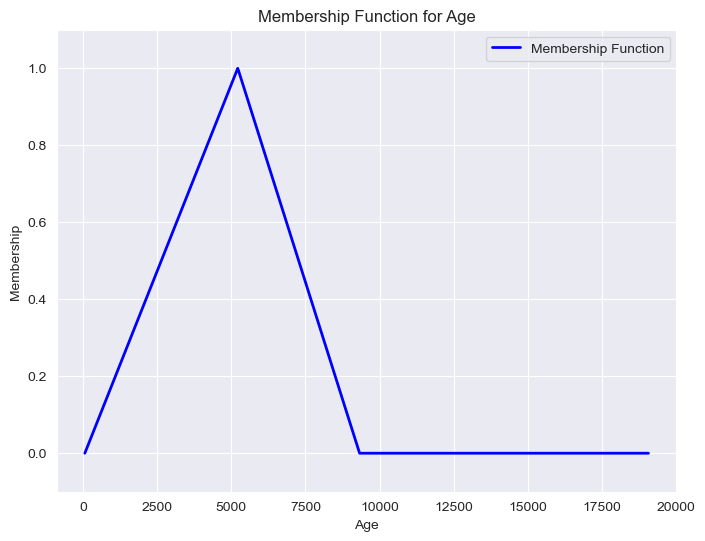

In [62]:
# So the below case can be used when we dont want to recommed to customers who have a very low monetary value spend or to customers who have a very high monetary value spend
# The reason could be that if we recommed to low purchasing customers then theu would not buy because they arent buying as frequently engh. Also busineess would decide not to recommend to customer who have a high monetary spend since they will anyway purcase.
#Business would like to recommd to customers who  have an avearge monetary spend since they would like to make these customers shift to the category who have a totalo moetary spend on the hoigher side.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the membership function
def monetary_traingular(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    return fuzz.trimf(x, [a, b, c])


# Generate x values for plotting
x = np.linspace(master_table_one_hot['total_monetary_value'].min(), master_table_one_hot['total_monetary_value'].max(), 1000)

# Calculate the membership function for x
mfx = monetary_traingular(x)

# Plot the membership function
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
plt.plot(x, mfx, 'b', linewidth=2, label='Membership Function')
plt.title('Membership Function for Age')
plt.xlabel('Age')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()
#between 25 and 40 the membership is considerably high. We would like to recommend these age groups fruits
#Above 40 people get health complications and have sugar. Youngsters dont usually consume fruits(external research)
#27 to about 40 is the sweet spot to recommend fruits 

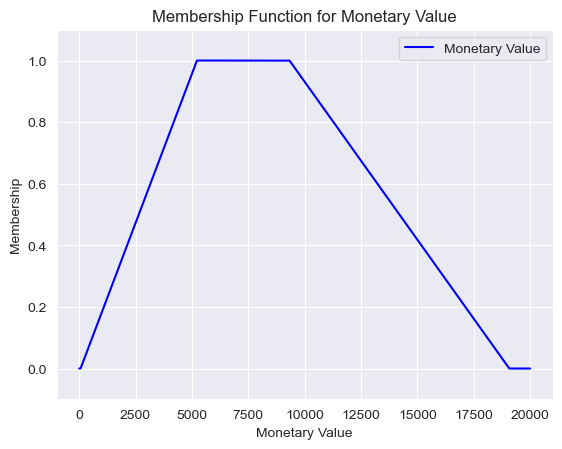

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    return fuzz.trapmf(x, [a, b, c, d]) 

x = np.arange(0, 20000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


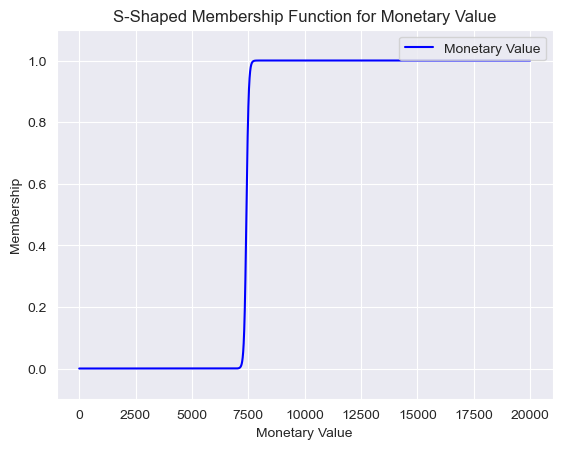

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_s_shaped_monetary_value(x):
    a = 0.02  # Shape parameter
    b = master_table_one_hot['total_monetary_value'].mean()  # Midpoint

    mfx = 1 / (1 + np.exp(-a * (x - b)))
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_s_shaped_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('S-Shaped Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


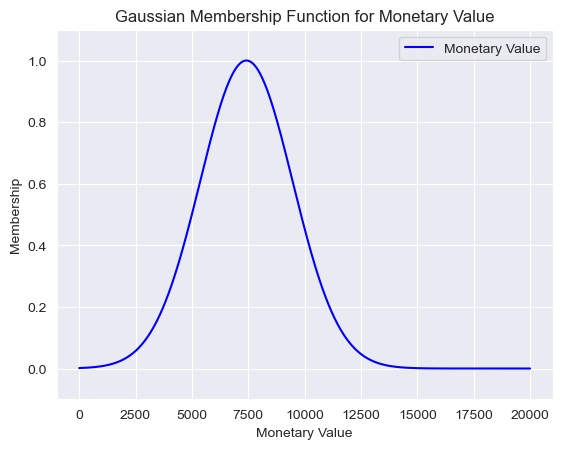

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_gaussian_monetary_value(x):
    mean = master_table_one_hot['total_monetary_value'].mean()
    sigma = (master_table_one_hot['total_monetary_value'].quantile(0.75) - 
             master_table_one_hot['total_monetary_value'].quantile(0.25)) / 2

    mfx = np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_gaussian_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Gaussian Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


### 4. Job Title

In [66]:
###  Next we were not able to find any specific trends in the below features. Therfore we created scores based on the average r=transaction counts. We will use these scores to create the memebrship functions. They are as belwo
### now memebrship functions can be used based on the business requirements. We shall play around with different membership functions

In [67]:
# 4. Job title
# So how we have planned to target our bikes is based on which job titles buy the most bycyles. So we are going to decide our fuzzy logic to recommend to those job titles who but the most cycles
# So this fuzzy logic along with the cluster logic will also recommend those cycles which similar user or job titles have bought while also giving a higher score to job titles which buy the most bycycles

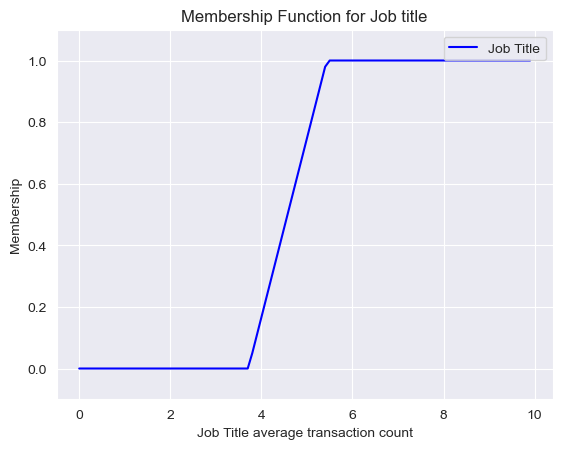

In [68]:
def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_job_title(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Job Title')
plt.title('Membership Function for Job title')
plt.xlabel('Job Title average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 5. Post Code

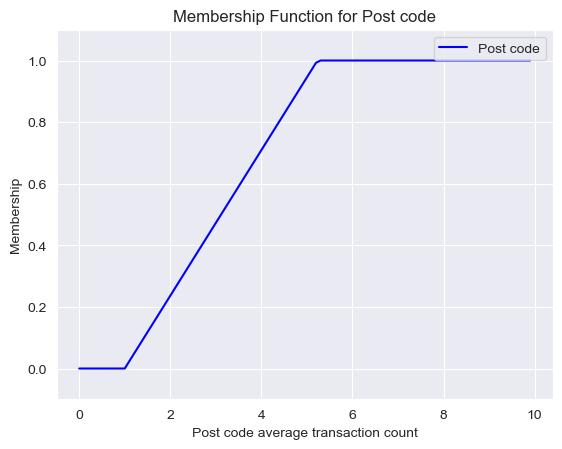

In [69]:
def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_post_code(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Post code')
plt.title('Membership Function for Post code')
plt.xlabel('Post code average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 6. Age

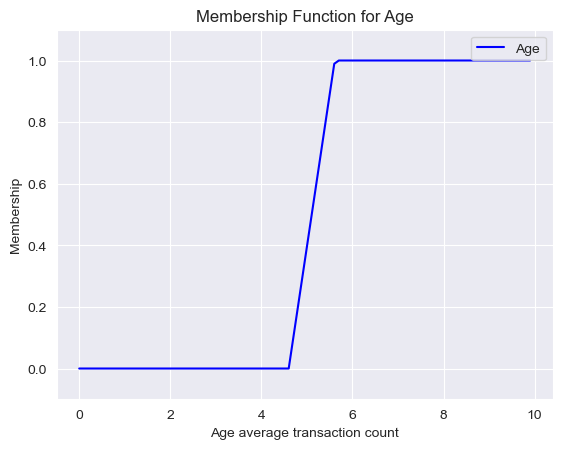

In [70]:
def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_age(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Age')
plt.title('Membership Function for Age')
plt.xlabel('Age average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 7. tenure_transaction_count

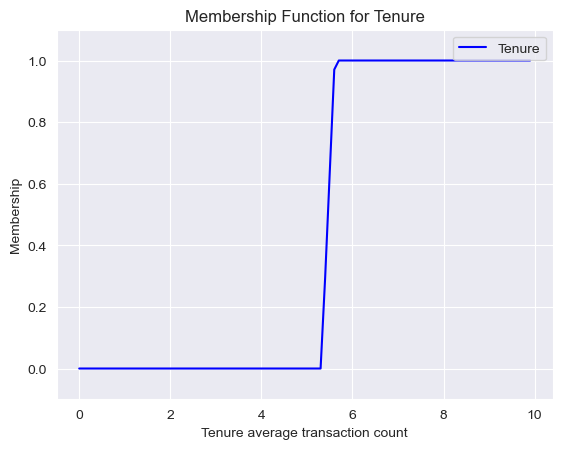

In [71]:
def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_tenure(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Tenure')
plt.title('Membership Function for Tenure')
plt.xlabel('Tenure average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### All the necessary memebership functions finally defined below:

In [72]:
def membership_brand(x):
    brands = master_table_one_hot.filter(regex='^brand_').columns.tolist()
    memberships = []
    for brand in brands:
        if brand in x:
            memberships.append(1)
        else:
            memberships.append(0)
    return np.array(memberships)

def membership_recency(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx





In [73]:
#Price
#owns car
#walth segmant
#

In [74]:
master_table_one_hot.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,3
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,7
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,2
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,5
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,7


In [75]:
brands = ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles','Giant Bicycles', 'WeareA2B']

### Building the collaboartive logic

In [76]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
    print("Length of membership_job_title_val:", len(membership_job_title_val))
    print("Length of membership_post_code_val:", len(membership_post_code_val))
    print("Length of membership_age_val:", len(membership_age_val))
    print("Length of membership_tenure_val:", len(membership_tenure_val))
    print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
#     for i in range(len(kmeans.cluster_centers_)):
        membership = min(membership_job_title_val[i],membership_post_code_val[i],membership_age_val[i],membership_tenure_val[i],membership_frequency_of_visits_val[i],membership_recency_val[i],membership_monetary_value_val[i],np.max(membership_brand_val))
        memberships.append(membership)

    # Generate recommendations for products and brands
    #recommendations_product = {}
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
#             support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[i][j + 18]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [81]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]
    

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
    
#     print("Length of membership_job_title_val:", len(membership_job_title_val))
#     print("Length of membership_post_code_val:", len(membership_post_code_val))
#     print("Length of membership_age_val:", len(membership_age_val))
#     print("Length of membership_tenure_val:", len(membership_tenure_val))
#     print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    #     for i in range(len(kmeans.cluster_centers_)):
            membership = membership_job_title_val[i]+membership_post_code_val[i]+membership_age_val[i]+membership_tenure_val[i]+membership_frequency_of_visits_val[i]+membership_recency_val[i]+membership_monetary_value_val[i]+np.max(membership_brand_val)
            memberships.append(membership)
  
    
    
        
#     customer_data = customer_data.reset_index()
    
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
    #         for j in range(len(product_names)):
    #             rule = f"product_{product_names[j]}"
    #             support = kmeans.cluster_centers_[i][j + 10]
    #             if rule not in recommendations_product:
    #                 recommendations_product[rule] = 0
    #             recommendations_product[rule] += support * membership
        
        cluster_number  = customer_data['cluster'].iloc[i]

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
    #         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[cluster_number][j + 19]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support + membership

    #     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


    

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [82]:
# Loop through each customer and generate recommendations
for customer_id in master_table_one_hot['customer_id'].unique():
    recommendations_product_brand  = fuzzy_recommendation(customer_id)
#     print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product}")
    print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product_brand}")
    


Top 5 recommendations for customer 2950: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 3120: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 402: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3135: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2339: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1542: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2459: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1305: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3262: ['Trek Bicycles

Top 5 recommendations for customer 757: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1778: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 211: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 32: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 119: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2347: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2353: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 788: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 1468: ['Trek Bicycles', 'Norco Bicycles', 'W

Top 5 recommendations for customer 3208: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2406: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2041: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1598: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 141: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1321: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 183: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1596: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 520: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 

Top 5 recommendations for customer 3394: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3260: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1015: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 58: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3118: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1414: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2202: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2144: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2157: ['Trek Bicycles', 'Norco 

Top 5 recommendations for customer 3249: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2939: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1035: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 492: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3100: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1586: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 31: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2498: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3415: ['Trek Bicycles', 'Norco Bicycles',

Top 5 recommendations for customer 1171: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1499: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2233: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 103: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1494: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3381: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1517: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 776: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1018: ['Trek Bicycles', 'Norco Bicycles', 'W

Top 5 recommendations for customer 2060: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2569: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2853: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 818: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3164: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2069: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2296: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2836: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1436: ['Trek Bicycles', 'Norco Bicycles', '

Top 5 recommendations for customer 459: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 669: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2894: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2184: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2908: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1340: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2419: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 445: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 463: ['Trek Bicycles', 'Nor

Top 5 recommendations for customer 3086: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 637: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1190: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2177: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1671: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2247: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2344: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2440: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 967: ['Trek Bicycles', 'Norco Bicycles', 'WeareA

Top 5 recommendations for customer 152: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 233: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 802: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2924: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2142: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 82: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 636: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1000: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1138: ['Trek Bicycles', 'Norco Bicycles

Top 5 recommendations for customer 2678: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2513: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3247: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2629: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3463: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 3034: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 355: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3115: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1382: ['Trek Bicycles', 'Norco Bicycles', 'Weare

Top 5 recommendations for customer 732: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3052: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2719: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 343: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 215: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2372: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3465: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1234: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1669: ['Norco 

Top 5 recommendations for customer 677: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 1533: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 226: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3216: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3254: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3373: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 918: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 406: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2223: ['Norco Bicycles', 'Trek Bicycles', 

Top 5 recommendations for customer 1081: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1623: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3219: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2358: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1942: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3371: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2457: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1063: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2382: ['Norco Bicycles', 'Trek Bicycles', 

Top 5 recommendations for customer 2782: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2610: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2160: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3292: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 3169: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1103: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 830: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 966: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2094: ['Trek Bicycles', 'Norco Bicycles', 'We

Top 5 recommendations for customer 2864: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2502: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2020: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2163: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 920: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2456: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1848: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 270: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1106: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM

Top 5 recommendations for customer 1911: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2245: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 80: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2936: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2390: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 611: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 89: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1682: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2955: ['Norco Bicycl

Top 5 recommendations for customer 888: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1154: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 3031: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1157: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 719: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2913: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1949: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1543: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2760: ['Trek Bicycles', 'Norco 

Top 5 recommendations for customer 1100: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1440: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1176: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 159: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1101: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1438: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 205: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2280: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1191: ['Norco Bicycles', 'Trek Bicycles', 'W

Top 5 recommendations for customer 1827: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 263: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2277: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3054: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2479: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2929: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2112: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1885: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 67: ['Trek Bicycles', 'No

Top 5 recommendations for customer 298: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2415: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 187: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 489: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1635: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2068: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1752: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1776: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2196: ['Norco Bicycles', 'Trek Bicycles', 'We

Top 5 recommendations for customer 3129: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1367: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2562: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2888: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3334: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 1801: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2012: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2454: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 849: ['Trek Bicycles', 'N

Top 5 recommendations for customer 2914: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1092: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2425: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1313: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1547: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1863: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3003: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3114: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3105: ['Trek Bicycles', 'Norco Bicycles', 

Top 5 recommendations for customer 2804: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 692: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 665: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 171: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1066: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 400: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2680: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3269: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2987: ['Trek Bicycles', 'Norco Bicycles', 'Wea

Top 5 recommendations for customer 3030: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2248: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 910: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2586: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3411: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2185: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3202: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 256: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1844: ['Trek Bicycles', 'Norco Bicycles', 'W

Top 5 recommendations for customer 840: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1111: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1261: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 764: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1009: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2846: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2043: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1366: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1733: ['Norco Bicycles', '

Top 5 recommendations for customer 428: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 123: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 625: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 987: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2259: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2671: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2689: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2256: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 730: ['Norco Bicycles', 'Tre

Top 5 recommendations for customer 873: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1022: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1489: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1426: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2120: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1425: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3145: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 186: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 525: ['Trek Bicycles', 'Norco Bicycles', 'We

Top 5 recommendations for customer 1831: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2723: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2966: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3475: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1594: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 721: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2761: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2964: ['Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2324: ['Trek Bicycles', 'Norco Bicycles', '

Top 5 recommendations for customer 1760: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 847: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1083: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1150: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2283: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 3450: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 749: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 782: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1630: ['Trek Bicycles', 'Norco Bicycles', 'We

Top 5 recommendations for customer 2841: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3074: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1790: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2480: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 744: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 843: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 938: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3110: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1131: ['Trek Bicycles', 'Norco Bicycles', 'We

Top 5 recommendations for customer 1900: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2967: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 630: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1267: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 829: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 425: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 14: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 560: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2066: ['Trek

Top 5 recommendations for customer 1270: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 844: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3037: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1296: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2164: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2323: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2668: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2321: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1876: ['Trek Bicycles', '

Top 5 recommendations for customer 3057: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2162: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 429: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 866: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2910: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2077: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2466: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 932: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2305: ['Trek Bicycles', 'Norco Bicyc

Top 5 recommendations for customer 2319: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1285: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1982: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2235: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 980: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1654: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 587: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 554: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 1044: ['Norco Bicy

Top 5 recommendations for customer 1536: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 13: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3189: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 1636: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3426: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 584: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 863: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 1439: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3066: ['Trek Bicycles', 'Norc

Top 5 recommendations for customer 2835: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 3341: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 2535: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1486: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2004: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1080: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 3311: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 2417: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'OHM Cycles']
Top 5 recommendations for customer 3139: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'O

Top 5 recommendations for customer 2021: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 2416: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 589: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 1975: ['Norco Bicycles', 'Trek Bicycles', 'WeareA2B', 'Solex', 'Giant Bicycles']
Top 5 recommendations for customer 373: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2450: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 2960: ['Trek Bicycles', 'WeareA2B', 'Norco Bicycles', 'OHM Cycles', 'Giant Bicycles']
Top 5 recommendations for customer 600: ['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'OHM Cycles', 'Solex']
Top 5 recommendations for customer 1632: ['Trek Bicycl

In [ ]:
column_name = 'brand_Giant Bicycles'
column_index = master_table_one_hot.columns.get_loc(column_name)

In [ ]:
column_index 
#finiding the column index to start from that is the brands column


In [ ]:
customer_data

In [ ]:
customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == 15]
customer_data = customer_data.reset_index()


    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
membership_recency_val = membership_recency(customer_data['recency'].values)
membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
membership_age_val = membership_age(customer_data['age_transaction_count'].values)
membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
print("Length of membership_job_title_val:", len(membership_job_title_val))
print("Length of membership_post_code_val:", len(membership_post_code_val))
print("Length of membership_age_val:", len(membership_age_val))
print("Length of membership_tenure_val:", len(membership_tenure_val))
print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))


membership_brand_val 




In [ ]:
customer_data

NameError: name 'customer_data' is not defined

In [ ]:
customer_data = customer_data.reset_index()

In [ ]:
cluster_number  = customer_data['cluster'][1]


In [ ]:
cluster_number

In [ ]:
membership_job_title_val

In [ ]:
#memebership or total brands should be less than the numebr of clusters.so quantity needs to be aggregared

In [ ]:
membership_post_code_val

In [ ]:
membership_age_val

In [ ]:
membership_tenure_val

In [ ]:
membership_recency_val

In [ ]:
memberships = []
for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    membership = min(membership_job_title_val[i], membership_post_code_val[i], membership_age_val[i], membership_tenure_val[i], membership_frequency_of_visits_val[i], membership_recency_val[i], membership_monetary_value_val[i], np.max(membership_brand_val))
    memberships.append(membership)

In [ ]:
memberships

In [ ]:
len(membership_job_title_val)

In [ ]:
len(membership_post_code_val)

In [ ]:
len(membership_age_val)

In [ ]:
len(membership_tenure_val)

In [ ]:
recommendations_brand = {}
for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership
cluster_number  = customer_data['cluster']['i']

    for j in range(len(brands)):
        rule = f"brand_{brands[j]}"
#         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
        support = kmeans.cluster_centers_[cluster_number][j + 18]
        if rule not in recommendations_brand:
            recommendations_brand[rule] = 0
        recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


In [ ]:
kmeans.cluster_centers_

In [ ]:
len(brands)

In [ ]:
customer_data

In [ ]:
rows_to_display = slice(0, 8)  # Rows 0 to 7
columns_to_display = slice(19, 25)  # Columns 19 to 24 (exclusive)

# Select the relevant rows and columns from cluster_centers_
selected_cluster_centers = kmeans.cluster_centers_[rows_to_display, columns_to_display]

# Print the selected cluster centers
print("Selected Cluster Centers (Rows 0 to 7, Columns 19 to 24):")
print(selected_cluster_centers)

In [ ]:
selected_columns = customer_data.iloc[:, [ 18,19, 20, 21, 22,23,24, -1]]
selected_columns

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[1][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[5][19]

In [ ]:
kmeans.cluster_centers_[6][19]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[1][20]

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[3][20]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[7][20]

In [ ]:
kmeans.cluster_centers_[2][21]

In [ ]:
kmeans.cluster_centers_[2][22]

In [ ]:
kmeans.cluster_centers_[2][23]

In [ ]:
kmeans.cluster_centers_[2][24]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[4][21]

In [ ]:
kmeans.cluster_centers_[4][22]

In [ ]:
kmeans.cluster_centers_[4][23]

In [ ]:
kmeans.cluster_centers_[4][24]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
max_valid_index = len(kmeans.cluster_centers_) - 1

In [ ]:
max_valid_j = len(kmeans.cluster_centers_[0]) - 1

In [ ]:
max_valid_index

In [ ]:
max_valid_j

In [ ]:
support

In [ ]:
i

In [ ]:
j

In [ ]:
recommendations_brand

In [ ]:
range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val)))     
 

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a DataFrame with 10 rows and 3 columns
data = {
    'Feature1': [1, 2, 5, 6, 9, 12, 15, 18, 20, 22],
    'Feature2': [3, 4, 7, 8, 10, 13, 16, 19, 21, 23],
    'Feature3': [0, 1, 4, 7, 9, 11, 14, 17, 20, 24]
}
df = pd.DataFrame(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)


In [ ]:
# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


In [ ]:
kmeans.cluster_centers_[0][0]

In [ ]:
kmeans.cluster_centers_[0][1]

In [ ]:
kmeans.cluster_centers_[8][2]